In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os
import sklearn 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

from tensorflow.keras.layers import Conv2D,MaxPool2D

from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import vgg19
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf
import os

In [ ]:
PATH = os.getcwd()
print(PATH)
PATH = r"/content/gdrive/MyDrive/out"
data_dir_list = os.listdir(PATH)
data_dir_list.sort(key=int)
print(data_dir_list)

/content
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


In [ ]:
img_rows=32
img_cols=32
num_channel=3

num_epoch = 10
batch_size = 64

img_data_list=[]
classes_names_list=[]
target_column=[]

In [ ]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(PATH+'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from 01 folder

Getting images from 02 folder

Getting images from 03 folder

Getting images from 04 folder

Getting images from 05 folder

Getting images from 06 folder

Getting images from 07 folder

Getting images from 08 folder

Getting images from 09 folder

Getting images from 10 folder

Getting images from 11 folder

Getting images from 12 folder

Getting images from 13 folder

Getting images from 14 folder

Getting images from 15 folder

Getting images from 16 folder

Getting images from 17 folder

Getting images from 18 folder

Getting images from 19 folder

Getting images from 20 folder

Getting images from 21 folder

Getting images from 22 folder

Getting images from 23 folder

Getting images from 24 folder

Getting images from 25 folder

Getting images from 26 folder

Getting images from 27 folder

Getting images from 28 folder

Getting images from 29 folder

Getting images from 30 folder

Getting images from 31 folder

Getting images from 32 folder

Getting 

In [ ]:
num_classes = len(classes_names_list)
print(num_classes)

35


In [ ]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)
img_data

(38929, 32, 32, 3)


array([[[[0.39215687, 0.39215687, 0.3647059 ],
         [0.7607843 , 0.73333335, 0.6392157 ],
         [0.43529412, 0.44313726, 0.41568628],
         ...,
         [0.59607846, 0.5803922 , 0.56078434],
         [0.5411765 , 0.49411765, 0.44705883],
         [0.49019608, 0.42352942, 0.35686275]],

        [[0.28627452, 0.25882354, 0.22352941],
         [0.64705884, 0.60784316, 0.5372549 ],
         [0.38431373, 0.36862746, 0.35686275],
         ...,
         [0.5568628 , 0.5568628 , 0.53333336],
         [0.5254902 , 0.4862745 , 0.45490196],
         [0.47058824, 0.42745098, 0.3764706 ]],

        [[0.3882353 , 0.38039216, 0.34901962],
         [0.42745098, 0.39215687, 0.3372549 ],
         [0.5647059 , 0.56078434, 0.54509807],
         ...,
         [0.5294118 , 0.53333336, 0.5254902 ],
         [0.4627451 , 0.42352942, 0.39215687],
         [0.48235294, 0.45490196, 0.44313726]],

        ...,

        [[0.30588236, 0.35686275, 0.3647059 ],
         [0.29803923, 0.3254902 , 0.3372549 ]

In [ ]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [ ]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
filepath="/content/gdrive/MyDrive/model_weights/resnet.h5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
#from keras.callbacks import ModelCheckpoint
# autosave best Model
#best_model_file = "vggb&w.h5"
#best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stop=EarlyStopping(monitor='val_accuracy',patience=5, verbose=True)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(include_top=False, weights=None, input_shape=(32,32,3))
resnet.trainable = True

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(35, activation="softmax")(x)


In [ ]:
modelrsnt = Model(inputs=resnet.input, outputs=predictions)

In [ ]:
modelrsnt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Total params: 24,654,755
Trainable params: 24,601,635
Non-trainable params: 53,120


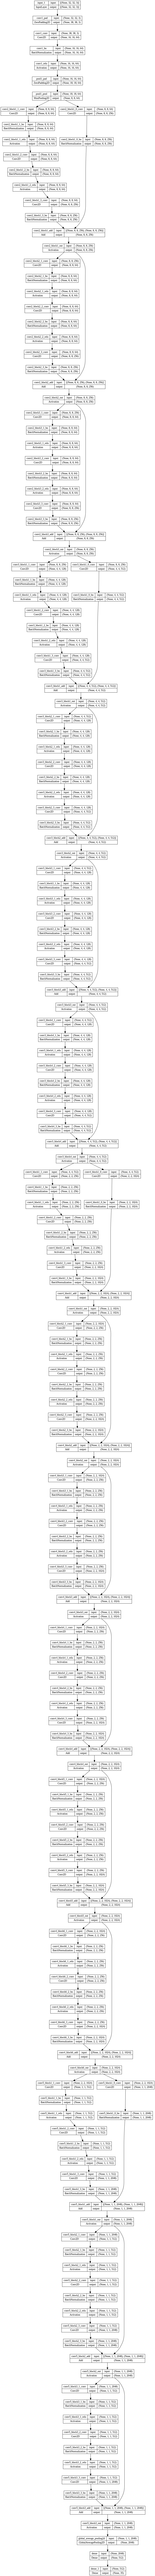

In [ ]:
trainable_count = np.sum([K.count_params(w) for w in modelrsnt.trainable_weights])
non_trainable_count = np.sum([K.count_params(w) for w in modelrsnt.non_trainable_weights])

print('Total params: {:,}'.format(trainable_count + non_trainable_count))
print('Trainable params: {:,}'.format(trainable_count))
print('Non-trainable params: {:,}'.format(non_trainable_count))
from keras.utils.vis_utils import plot_model
plot_model(modelrsnt, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# part - 2 -- Fitting the CNN to the images

In [ ]:
res = modelrsnt.fit(X_train,y_train, epochs=30,
                              #steps_per_epoch=364
                              batch_size=64,
                              callbacks=[best_model, early_stop],
                              validation_split=0.2,
                             #validation_steps=971,
                           
                   )

Epoch 1/30
390/390 [==============================] - ETA: 0s - loss: 0.9396 - accuracy: 0.7630
Epoch 1: val_loss improved from inf to 5.64905, saving model to /content/gdrive/MyDrive/model_weights/resnet.h5
390/390 [==============================] - 43s 73ms/step - loss: 0.9396 - accuracy: 0.7630 - val_loss: 5.6491 - val_accuracy: 0.1148
Epoch 2/30
389/390 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9385
Epoch 2: val_loss improved from 5.64905 to 1.35669, saving model to /content/gdrive/MyDrive/model_weights/resnet.h5
390/390 [==============================] - 22s 56ms/step - loss: 0.2247 - accuracy: 0.9386 - val_loss: 1.3567 - val_accuracy: 0.6786
Epoch 3/30
389/390 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9710
Epoch 3: val_loss improved from 1.35669 to 1.26607, saving model to /content/gdrive/MyDrive/model_weights/resnet.h5
390/390 [==============================] - 22s 57ms/step - loss: 0.0995 - accuracy: 0.9710 - val_loss:

In [ ]:
modelrsnt.load_weights('/content/gdrive/MyDrive/model_weights/resnet.h5')

In [ ]:

score = modelrsnt.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

122/122 [==============================] - 2s 18ms/step - loss: 0.0098 - accuracy: 0.9983
Test Loss 0.009839363396167755
Test Accuracy 0.9983303546905518


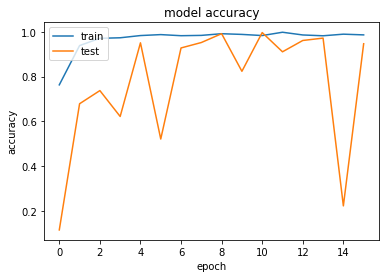

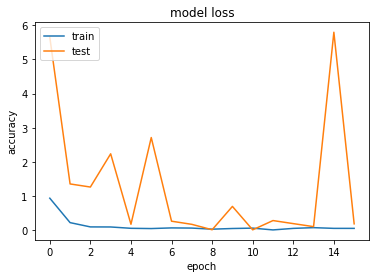

In [ ]:
#Summarize hist for accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
preds = np.round(modelrsnt.predict((X_test)),0)
print("rounded test_labels",preds)

244/244 [==============================] - 4s 12ms/step
rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
test_labels = np.array((y_test))

In [ ]:
experiment_labels = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35']
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

          01       1.00      1.00      1.00       246
          02       1.00      1.00      1.00       200
          03       1.00      1.00      1.00       216
          04       1.00      1.00      1.00       233
          05       1.00      0.98      0.99       239
          06       1.00      1.00      1.00       203
          07       1.00      1.00      1.00       206
          08       1.00      1.00      1.00       238
          09       1.00      1.00      1.00       210
          10       1.00      1.00      1.00       214
          11       1.00      1.00      1.00       242
          12       1.00      1.00      1.00       206
          13       1.00      1.00      1.00       235
          14       1.00      1.00      1.00       222
          15       1.00      1.00      1.00       240
          16       1.00      1.00      1.00       233
          17       1.00      1.00      1.00       221
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_labels = np.array((y_test))

244/244 [==============================] - 3s 11ms/step


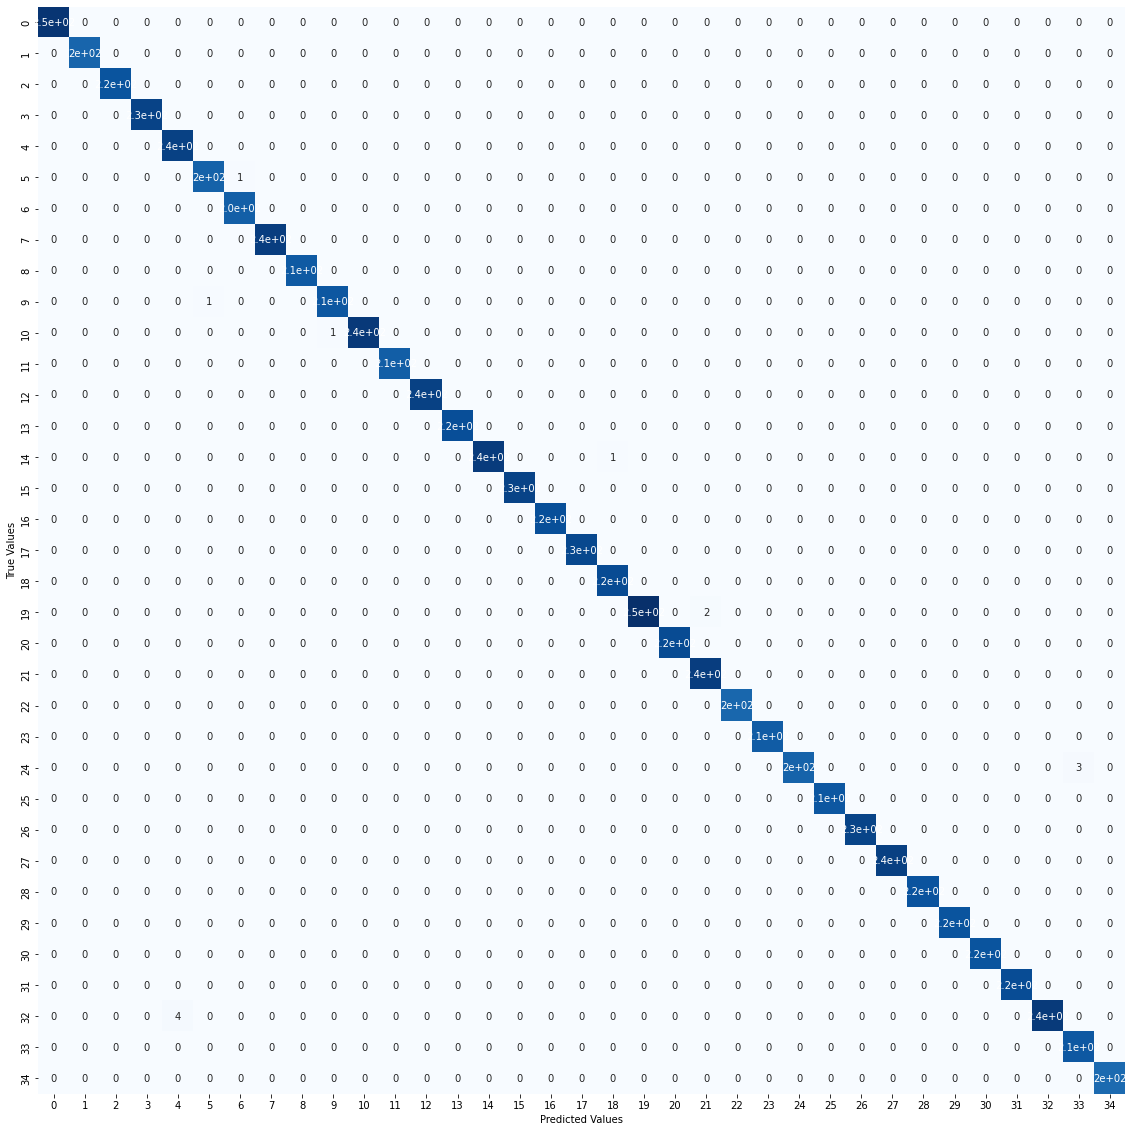

In [ ]:
fig = plt.figure(figsize=(20, 20))

pred = modelrsnt.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
modelrsnt1 = Model(inputs=resnet.input, outputs=predictions)
modelrsnt1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="/content/gdrive/MyDrive/model_weights/resnet1.h5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
#from keras.callbacks import ModelCheckpoint
# autosave best Model
#best_model_file = "vggb&w.h5"
#best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stop=EarlyStopping(monitor='val_accuracy',patience=5, verbose=True)

In [ ]:
res2 = modelrsnt1.fit(X_train,y_train, epochs=30,
                              #steps_per_epoch=364
                              batch_size=64,
                              callbacks=[best_model, early_stop],
                              validation_split=0.2,
                             #validation_steps=971,
                           
                   )

Epoch 1/30
341/341 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 0.9722
Epoch 1: val_loss improved from inf to 2.94184, saving model to /content/gdrive/MyDrive/model_weights/resnet1.h5
341/341 [==============================] - 30s 72ms/step - loss: 0.1164 - accuracy: 0.9722 - val_loss: 2.9418 - val_accuracy: 0.4116
Epoch 2/30
341/341 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9825
Epoch 2: val_loss improved from 2.94184 to 0.31709, saving model to /content/gdrive/MyDrive/model_weights/resnet1.h5
341/341 [==============================] - 20s 57ms/step - loss: 0.0871 - accuracy: 0.9825 - val_loss: 0.3171 - val_accuracy: 0.9037
Epoch 3/30
340/341 [============================>.] - ETA: 0s - loss: 0.0391 - accuracy: 0.9914
Epoch 3: val_loss did not improve from 0.31709
341/341 [==============================] - 16s 48ms/step - loss: 0.0391 - accuracy: 0.9914 - val_loss: 1.6619 - val_accuracy: 0.7002
Epoch 4/30
340/341 [================

In [ ]:
modelrsnt1.load_weights('/content/gdrive/MyDrive/model_weights/resnet1.h5')

In [ ]:

score = modelrsnt1.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

183/183 [==============================] - 3s 16ms/step - loss: 0.0033 - accuracy: 0.9994
Test Loss 0.0033327422570437193
Test Accuracy 0.9994006156921387


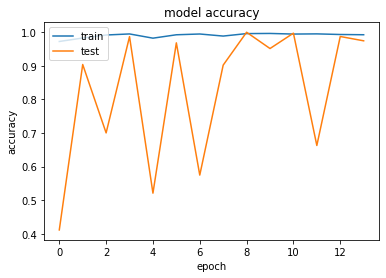

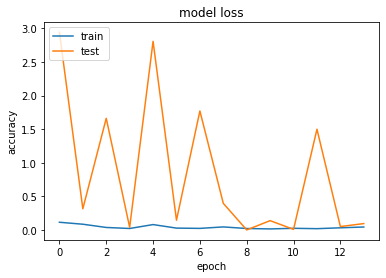

In [ ]:
#Summarize hist for accuracy
plt.plot(res2.history['accuracy'])
plt.plot(res2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(res2.history['loss'])
plt.plot(res2.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
preds = np.round(modelrsnt.predict((X_test)),0)
print("rounded test_labels",preds)

365/365 [==============================] - 4s 11ms/step
rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
test_labels = np.array((y_test))

In [ ]:
experiment_labels = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35']
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

          01       1.00      1.00      1.00       361
          02       1.00      1.00      1.00       312
          03       1.00      1.00      1.00       339
          04       1.00      1.00      1.00       352
          05       1.00      1.00      1.00       332
          06       1.00      1.00      1.00       325
          07       1.00      1.00      1.00       324
          08       0.99      1.00      1.00       362
          09       1.00      1.00      1.00       336
          10       1.00      0.99      0.99       345
          11       1.00      1.00      1.00       352
          12       1.00      1.00      1.00       322
          13       1.00      1.00      1.00       343
          14       1.00      0.98      0.99       314
          15       1.00      1.00      1.00       340
          16       1.00      1.00      1.00       359
          17       1.00      1.00      1.00       329
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_labels = np.array((y_test))

365/365 [==============================] - 4s 11ms/step


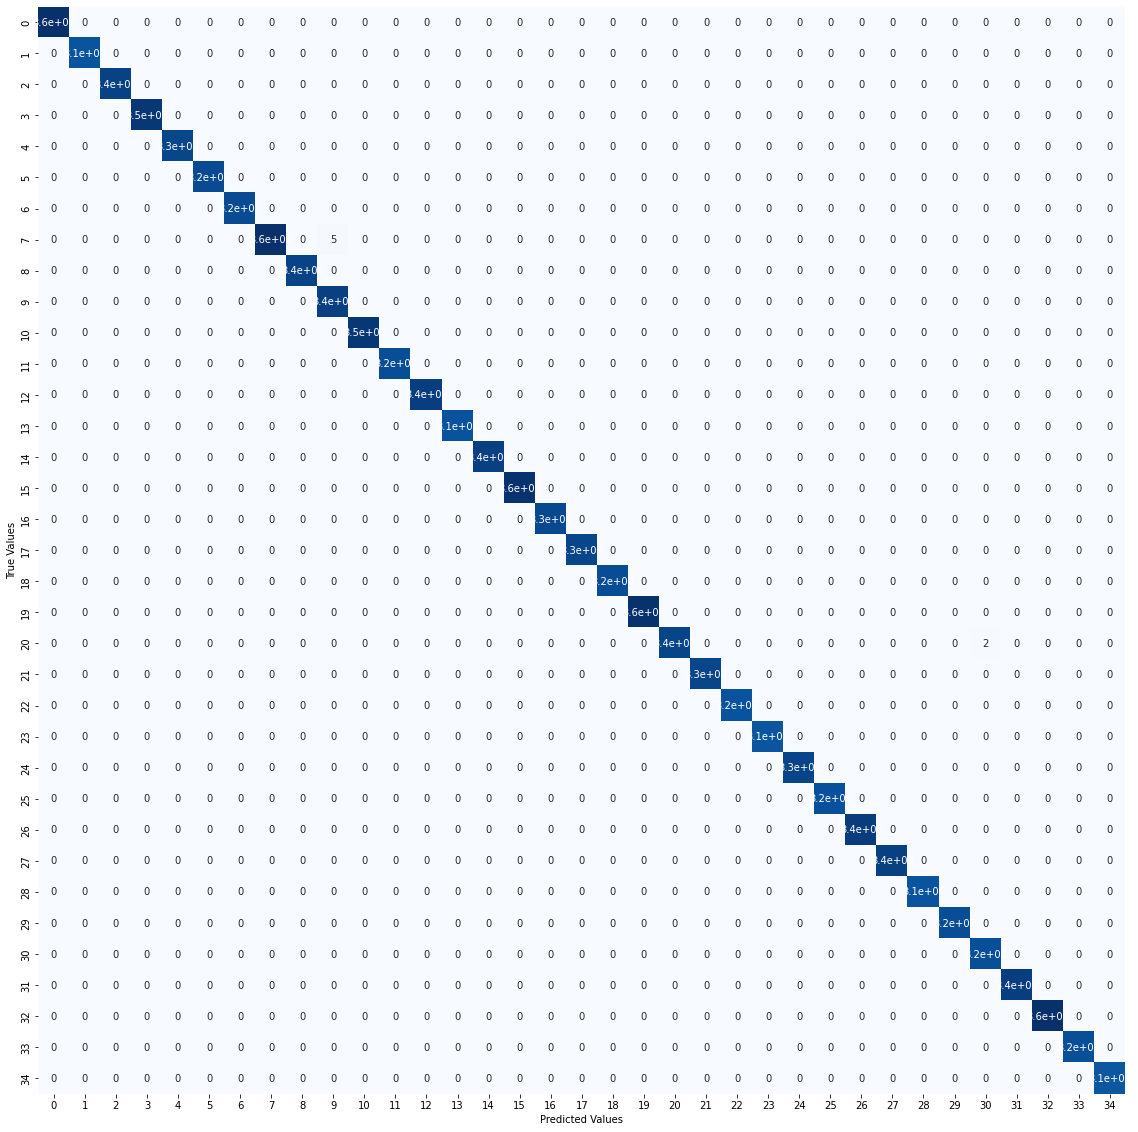

In [ ]:
fig = plt.figure(figsize=(20, 20))

pred = modelrsnt.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=2)

In [ ]:
X_train.shape

(23357, 32, 32, 3)

In [ ]:
modelrsnt2 = Model(inputs=resnet.input, outputs=predictions)
modelrsnt2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="/content/gdrive/MyDrive/model_weights/resnet2.h5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
#from keras.callbacks import ModelCheckpoint
# autosave best Model
#best_model_file = "vggb&w.h5"
#best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stop=EarlyStopping(monitor='val_accuracy',patience=5, verbose=True)

In [ ]:
res1 = modelrsnt2.fit(X_train,y_train, epochs=30,
                              #steps_per_epoch=364
                              batch_size=64,
                              callbacks=[best_model, early_stop],
                              validation_split=0.2,
                             #validation_steps=971,
                           
                   )

Epoch 1/30
292/292 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9875
Epoch 1: val_loss improved from inf to 0.07529, saving model to /content/gdrive/MyDrive/model_weights/resnet2.h5
292/292 [==============================] - 31s 87ms/step - loss: 0.0578 - accuracy: 0.9875 - val_loss: 0.0753 - val_accuracy: 0.9803
Epoch 2/30
292/292 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9957
Epoch 2: val_loss improved from 0.07529 to 0.00621, saving model to /content/gdrive/MyDrive/model_weights/resnet2.h5
292/292 [==============================] - 18s 61ms/step - loss: 0.0199 - accuracy: 0.9957 - val_loss: 0.0062 - val_accuracy: 0.9983
Epoch 3/30
292/292 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9916
Epoch 3: val_loss did not improve from 0.00621
292/292 [==============================] - 14s 49ms/step - loss: 0.0417 - accuracy: 0.9916 - val_loss: 0.3617 - val_accuracy: 0.9043
Epoch 4/30
291/292 [================

In [ ]:
modelrsnt2.load_weights('/content/gdrive/MyDrive/model_weights/resnet2.h5')

In [ ]:

score = modelrsnt2.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

244/244 [==============================] - 5s 16ms/step - loss: 0.0011 - accuracy: 0.9997
Test Loss 0.0010576064232736826
Test Accuracy 0.9997431039810181


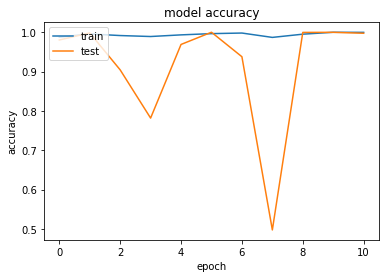

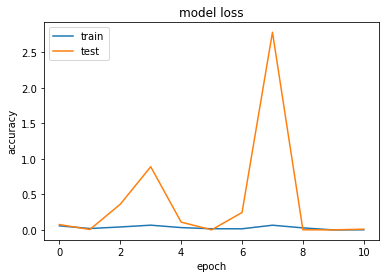

In [ ]:
#Summarize hist for accuracy
plt.plot(res1.history['accuracy'])
plt.plot(res1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(res1.history['loss'])
plt.plot(res1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()